In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [10]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Age'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Age'].fillna(mean_fare)

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
118,24.0,247.5208,1,24.00,24.000000,24.0000,24.000000
331,45.5,28.5000,0,45.50,45.500000,45.5000,45.500000
454,NaN,8.0500,0,28.75,29.785904,14.4583,32.617597
706,45.0,13.5000,0,45.00,45.000000,45.0000,45.000000
373,22.0,NaN,0,22.00,22.000000,22.0000,22.000000


In [17]:
print('Original Age Variable Variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare Variable Variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age Variable Variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare Variable Variance:  2448.1979137063163
Fare Variance after median imputation:  200.55085535155044
Fare Variance after mean imputation:  163.13478280526172


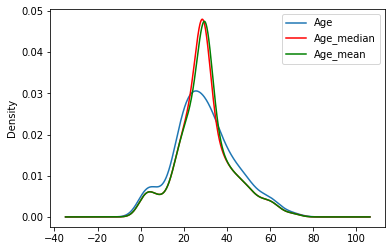

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind = 'kde', ax=ax, color = 'red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind = 'kde', ax=ax, color = 'green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

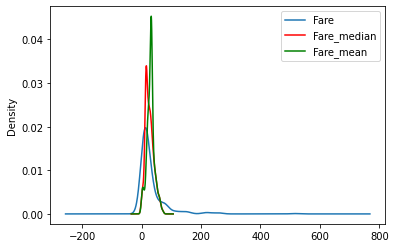

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind = 'kde', ax=ax, color = 'red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind = 'kde', ax=ax, color = 'green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [21]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,204.349513,204.349513
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,90.432552,49.169279
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,-4.649792,-5.237797
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,164.430718,161.328946
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,161.812625,161.812625
Fare_median,204.349513,90.432552,-4.649792,164.430718,161.812625,200.550855,154.655944
Fare_mean,204.349513,49.169279,-5.237797,161.328946,161.812625,154.655944,163.134783


In [22]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,1.000000,1.000000
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,0.128809,0.077538
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,-0.198528,-0.247957
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.912278,0.992420
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.898243,0.995939
Fare_median,1.000000,0.128809,-0.198528,0.912278,0.898243,1.000000,0.855029
Fare_mean,1.000000,0.077538,-0.247957,0.992420,0.995939,0.855029,1.000000


<Axes: >

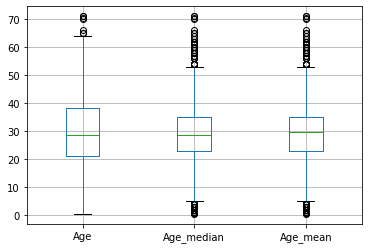

In [23]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

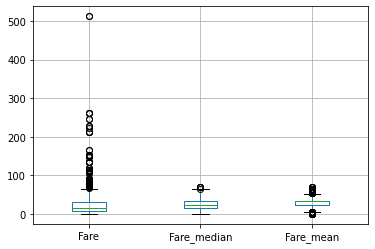

In [24]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

## Using Sklearn

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [32]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [34]:
trf = ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer2', imputer2,['Fare'])
], remainder = 'passthrough')

In [35]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [36]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [37]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [39]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [40]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])